In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. CSV 파일 불러오기

In [235]:
file_path = "C:/Ai-class/abalone.csv"  
df = pd.read_csv(file_path)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. 결측치 확인

In [238]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                결측치 개수  결측치 비율(%)
id                   0        0.0
Sex                  0        0.0
Length               0        0.0
Diameter             0        0.0
Height               0        0.0
Whole_weight         0        0.0
Shucked_weight       0        0.0
Viscera_weight       0        0.0
Shell_weight         0        0.0
Rings                0        0.0


결측치 X → 결측치 제거 필요없음

# 3. 결측치 제거 (평균값으로 대체)

In [242]:
# 결측치 개수 확인 (적용 전)
# print("결측치 개수(적용 전):", df["Age"].isnull().sum())

# 평균 나이 계산
# mean_age = df["Age"].mean()

# 결측치를 평균 나이로 채우기 
# df["Age"] = df["Age"].fillna(mean_age)  

# 결측치 개수 확인 (적용 후)
# print("결측치 개수(적용 후):", df["Age"].isnull().sum())

# 평균 나이 출력
# print(f"평균 나이로 채움: {mean_age:.2f}")

# print(df["Age"])

# 4. 레이블 확인

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64
Sex
M    36.581278
I    32.128322
F    31.290400
Name: proportion, dtype: float64


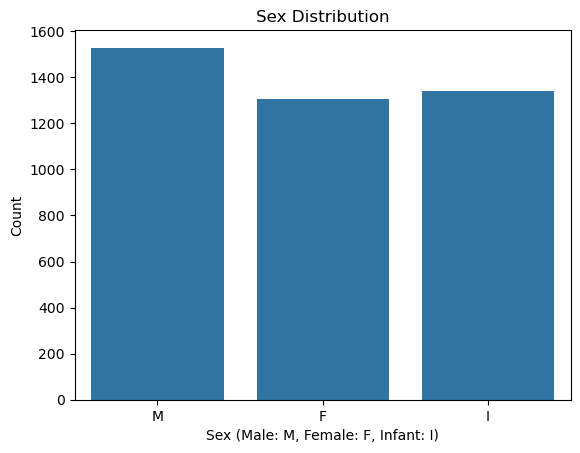

In [245]:
# 레이블 분포 확인
print(df["Sex"].value_counts())  # 클래스 개수 출력
print(df["Sex"].value_counts(normalize=True) * 100)  # 비율(%) 출력

# 시각화
sns.countplot(x="Sex", data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex (Male: M, Female: F, Infant: I)")
plt.ylabel("Count")
plt.show()

# 5. 불필요한 컬럼 제거

id 컬럼 제거

In [248]:
# 삭제할 칼럼 지정
df.drop(columns=['id'], inplace=True)

# 변경된 데이터프레임 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 라벨 인코딩

In [251]:
# 라벨 인코더 생성 및 적용
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# 결과 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


M > 2<br>F > 0<br>I > 1  으로 변환

### 특정 컬럼을 골라 라벨 인코딩

In [255]:
# 인코딩할 특정 컬럼 리스트
# cols_to_encode = ['Sex', 'Category', 'Region']  # 예: 'Sex'만 하고 싶으면 ['Sex']만 입력

# 라벨 인코더 저장용 딕셔너리
# label_encoders = {}

# 선택한 컬럼만 라벨 인코딩
# for col in cols_to_encode:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le  # 역변환용으로 저장

# 결과 확인
# print(df[cols_to_encode].head())

# 입력(X), 타겟(y) 분리 / 훈련, 테스트 데이터 분리

In [258]:
X = df.drop(columns=["Sex"])
y = df["Sex"] 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

# 머신러닝 분류 Decision Tree 모델 (DT)

In [261]:
# DT 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측 수행
pred_dt = dt_model.predict(X_test)

In [263]:
print("\n📌 accuracy 출력")
accuracy = accuracy_score(y_test, pred_dt)
print(f"DT 정확도: {accuracy:.4f}")

print("\n📌 confusion matrix 출력") 
print(confusion_matrix(y_test, pred_dt))



📌 accuracy 출력
DT 정확도: 0.4785

📌 confusion matrix 출력
[[125  54 137]
 [ 59 224  76]
 [151  68 151]]


# 머신러닝 분류 Random Forest 모델 (RF)

In [266]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측 수행
pred_rf = rf_model.predict(X_test)

In [267]:
print("\n📌 정확도 출력")
accuracy = accuracy_score(y_test, pred_rf)
print(f"RF 정확도: {accuracy:.4f}")

print("\n📌 confusion matrix 출력") 
print(confusion_matrix(y_test, pred_rf))


📌 정확도 출력
RF 정확도: 0.5541

📌 confusion matrix 출력
[[128  38 150]
 [ 36 278  45]
 [131  66 173]]


# 머신러닝 분류 SVM 모델

In [271]:
# SVM 모델 생성 및 학습
svm_model = SVC(kernel="linear", random_state=42)  # 선형 커널 사용
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

In [272]:
print("\n📌 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM 정확도: {accuracy:.4f}")

print("\n📌 confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_svm))


📌 정확도 출력
SVM 정확도: 0.5512

📌 confusion matrix 출력
[[  0  57 259]
 [  2 294  63]
 [  1  87 282]]


# 머신러닝 분류 Logistic Regression 모델 (LR)

In [276]:
# 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# 예측 수행
y_pred_lr = lr_model.predict(X_test)

In [277]:
print("\n📌 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LR 정확도: {accuracy:.4f}")

print("\n📌 confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_lr))


📌 정확도 출력
LR 정확도: 0.5742

📌 confusion matrix 출력
[[102  50 164]
 [ 15 289  55]
 [ 73  88 209]]


# 머신러닝 분류 KNN 모델 

KNN은 데이터 스케일링 필요!

In [281]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
# KNN 모델 생성 및 학습 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_knn = knn.predict(X_test)

In [285]:
print("\n📌 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN 정확도: {accuracy:.4f}")

print("\n📌 confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_knn))


📌 정확도 출력
KNN 정확도: 0.5196

📌 confusion matrix 출력
[[143  41 132]
 [ 59 260  40]
 [164  66 140]]


# 딥러닝 (텐서플로) 분류   

In [288]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras.optimizers import Adam

### 딥러닝 입력을 위한 넘파이 배열로 변환

In [291]:
X = X.values

### y값 원핫 인코딩 (다중분류일 때)

In [294]:
Y = pd.get_dummies(y).values

In [296]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [298]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341, 3), (836, 3))

#### input 데이터 : 8
#### Sex 컬럼을 분류 > 다중분류 (Male, Female, Infant) > 다중분류일 때는 y값 원핫인코딩 필수!!
#### → 활성화 함수 : softmax
#### → loss 함수 : categorical_crossentropy
<br><br><br>
##### 이진분류 > 활성화 함수 : sigmoid, loss 함수 : binary_crossentropy 
##### 다중분류 > 활성화 함수 : softmax, loss 함수 : categorical_crossentropy
##### input_shape 값은 X_train.shape[1]
##### 모델 학습의 마지막 출력층의 숫자 값은 
##### 이중 분류, 다중 분류인가에 따라 달라짐!! 
##### 이 상황에서는 ((3341, 8), (836, 8), (3341, 3), (836, 3)) 이므로 
##### 3 입력!!

# 모델 학습

In [302]:
model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 818 (3.20 KB)

 Non-trainable params: 0 (0.00 B)

In [304]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=25,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3532 - loss: 1.1140 - val_accuracy: 0.3337 - val_loss: 1.0707
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3767 - loss: 1.0481 - val_accuracy: 0.5084 - val_loss: 1.0082
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5089 - loss: 0.9820 - val_accuracy: 0.5263 - val_loss: 0.9162
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5108 - loss: 0.9115 - val_accuracy: 0.5299 - val_loss: 0.9002
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5155 - loss: 0.8974 - val_accuracy: 0.5419 - val_loss: 0.8900
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5157 - loss: 0.8896 - val_accuracy: 0.5275 - val_loss: 0.9118
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5411 - loss: 0.8668 - val_accuracy: 0.5359 - val_loss: 0.8954
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5432 - loss: 0.8809 - val_accuracy: 0.

# 시각화 그래프 출력

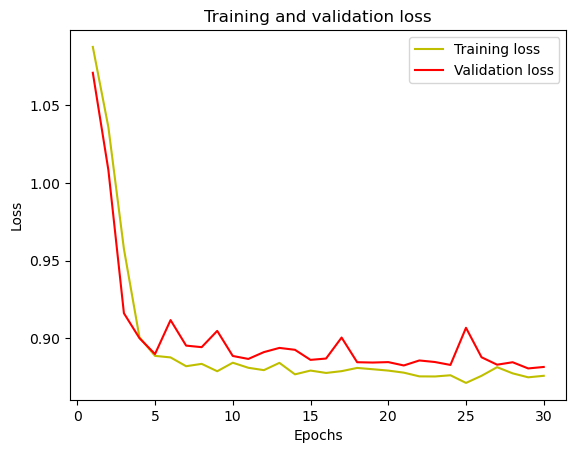

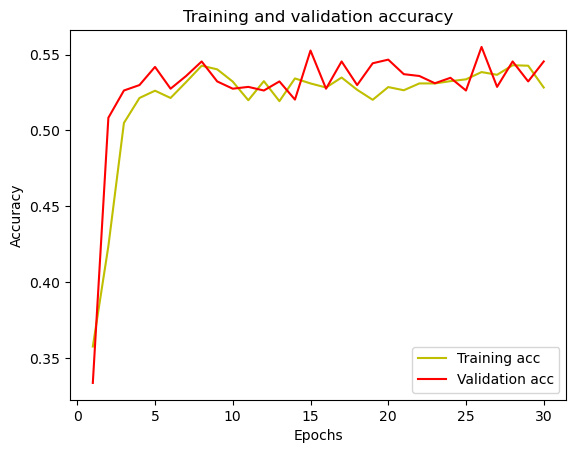

In [307]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# confusion_matrix 출력

In [310]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.55      0.09      0.15       249
           1       0.64      0.82      0.72       291
           2       0.46      0.66      0.54       296

    accuracy                           0.55       836
   macro avg       0.55      0.52      0.47       836
weighted avg       0.55      0.55      0.49       836

[[ 22  48 179]
 [  1 239  51]
 [ 17  84 195]]


# 딥러닝 (파이토치) 분류

In [59]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchsummary import summary
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기

In [62]:
df = pd.read_csv("C:/Ai-class/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


# 결측치 확인

In [65]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                               결측치 개수  결측치 비율(%)
Patient_Number                      0        0.0
Blood_Pressure_Abnormality          0        0.0
Level_of_Hemoglobin                 0        0.0
Genetic_Pedigree_Coefficient       92        4.6
Age                                 0        0.0
BMI                                 0        0.0
Sex                                 0        0.0
Pregnancy                        1558       77.9
Smoking                             0        0.0
Physical_activity                   0        0.0
salt_content_in_the_diet            0        0.0
alcohol_consumption_per_day       242       12.1
Level_of_Stress                     0        0.0
Chronic_kidney_disease              0        0.0
Adrenal_and_thyroid_disorders       0        0.0


# 결측치 처리

In [68]:
# 결측치를 평균 나이로 채우기 
df["Pregnancy"] = df["Pregnancy"].fillna(0)  # 임신여부 결측치 0으로 체체
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(0)  # 가족력 > 0으로 매
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(0)  # 알콜 섭취량은 평균값 또는 0으로 체체

print(df[["Pregnancy", "Genetic_Pedigree_Coefficient", "alcohol_consumption_per_day"]])

      Pregnancy  Genetic_Pedigree_Coefficient  alcohol_consumption_per_day
0           1.0                          0.90                          0.0
1           0.0                          0.23                        205.0
2           0.0                          0.91                         67.0
3           0.0                          0.43                        242.0
4           0.0                          0.83                        397.0
...         ...                           ...                          ...
1995        0.0                          0.02                        144.0
1996        1.0                          1.00                          0.0
1997        0.0                          0.22                          0.0
1998        0.0                          0.72                        253.0
1999        0.0                          0.09                        230.0

[2000 rows x 3 columns]


# 레이블 확인

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64
Blood_Pressure_Abnormality
0    50.65
1    49.35
Name: proportion, dtype: float64


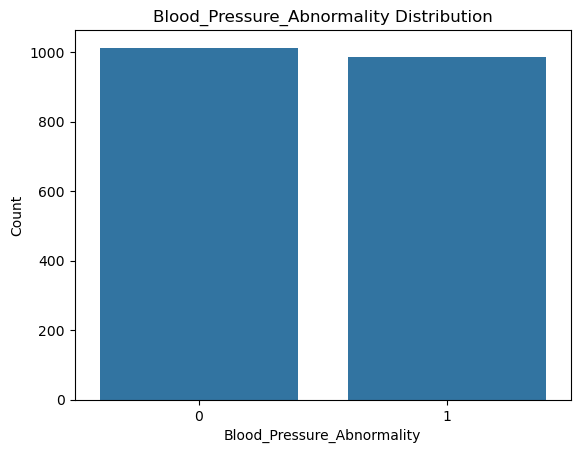

In [71]:
# 레이블 분포 확인
print(df["Blood_Pressure_Abnormality"].value_counts())  # 클래스 개수 출력
print(df["Blood_Pressure_Abnormality"].value_counts(normalize=True) * 100)  # 비율(%) 출력

# 시각화
sns.countplot(x="Blood_Pressure_Abnormality", data=df)
plt.title("Blood_Pressure_Abnormality Distribution")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Count")
plt.show()

# 불필요한 컬럼 제거

In [74]:
# 삭제할 칼럼 지정
df.drop(columns=['Patient_Number'], inplace=True)

# 변경된 데이터프레임 확인
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


# 데이터와 타겟 분리

In [76]:
# 데이터와 타겟 분리
X = df.drop(['Blood_Pressure_Abnormality'], axis=1).values
y = df['Blood_Pressure_Abnormality'].values

# 데이터 스케일링

In [79]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련, 테스트 데이터 분리

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

# NumPy/판다스 데이터를 PyTorch 텐서로 변환

In [97]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

C:\Users\hash0\AppData\Local\Temp\ipykernel_15652\761160216.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\hash0\AppData\Local\Temp\ipykernel_15652\761160216.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
C:\Users\hash0\AppData\Local\Temp\ipykernel_15652\761160216.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\hash0\AppData\Local\Temp\ipyke

# TensorDataset으로 X, y 묶기

In [99]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# DataLoader로 배치 학습 설정

In [102]:
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

# 모델 정의

In [106]:
class BFDense(nn.Module):
    def __init__(self):
        super(BFDense, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) 
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BFDense()

# Loss 함수, Optimizer 정의

In [108]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 모델 학습

In [110]:
# 학습
num_epochs = 30
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_dataloader))

    # 테스트 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            predicted = (probs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted.int() == labels.int()).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 0.6893, Accuracy: 57.25%
Epoch 2/30, Loss: 0.6810, Accuracy: 62.75%
Epoch 3/30, Loss: 0.6719, Accuracy: 68.25%
Epoch 4/30, Loss: 0.6616, Accuracy: 71.25%
Epoch 5/30, Loss: 0.6501, Accuracy: 72.75%
Epoch 6/30, Loss: 0.6376, Accuracy: 72.25%
Epoch 7/30, Loss: 0.6241, Accuracy: 73.00%
Epoch 8/30, Loss: 0.6102, Accuracy: 72.75%
Epoch 9/30, Loss: 0.5962, Accuracy: 72.50%
Epoch 10/30, Loss: 0.5828, Accuracy: 73.00%
Epoch 11/30, Loss: 0.5704, Accuracy: 73.00%
Epoch 12/30, Loss: 0.5596, Accuracy: 73.25%
Epoch 13/30, Loss: 0.5501, Accuracy: 72.75%
Epoch 14/30, Loss: 0.5418, Accuracy: 73.00%
Epoch 15/30, Loss: 0.5348, Accuracy: 72.75%
Epoch 16/30, Loss: 0.5287, Accuracy: 72.75%
Epoch 17/30, Loss: 0.5236, Accuracy: 72.75%
Epoch 18/30, Loss: 0.5191, Accuracy: 73.25%
Epoch 19/30, Loss: 0.5152, Accuracy: 73.25%
Epoch 20/30, Loss: 0.5116, Accuracy: 73.75%
Epoch 21/30, Loss: 0.5083, Accuracy: 74.00%
Epoch 22/30, Loss: 0.5053, Accuracy: 74.75%
Epoch 23/30, Loss: 0.5024, Accuracy: 74.2

In [112]:
# 평가
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        predicted = (probs >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[152  56]
 [ 43 149]]
F1 Score: 0.75
Precision: 0.75
Recall: 0.75
Specificity: 0.75


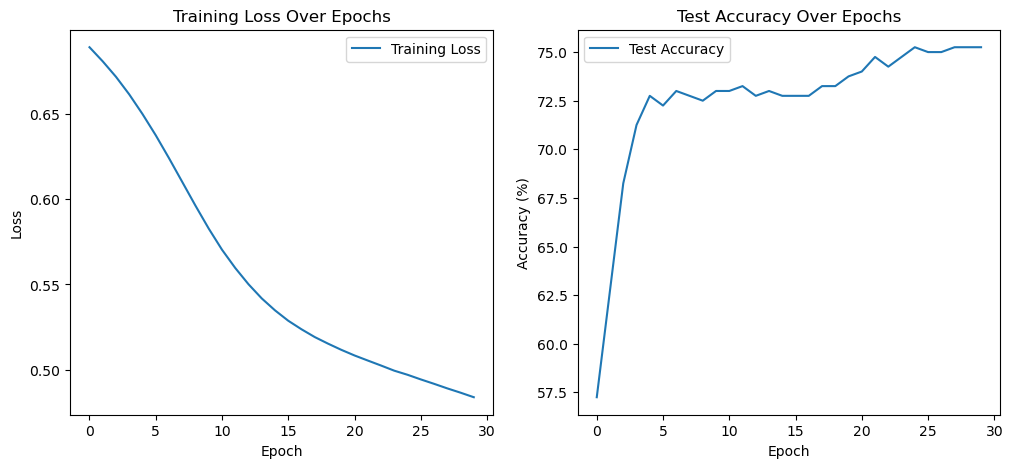

In [114]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()